## Introduction - Prediction of Heart Disease
To undertake this study, the below Machine Learning and Data Mining Work-Flow 9 Step pathway will be followed ensuring best practice:

![alt text](images/ML-work-flow.PNG)

## Importing neccessary libraries

In [ ]:
from plotnine import *

import numpy as np

from scipy import sparse

import pandas as pd
from IPython.display import display

import seaborn as sns
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import models
from keras import layers
from keras.constraints import maxnorm
from keras.optimizers import SGD

import pickle

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

##  What are we interested in answering and what is the context?

Goal:
Given a study population of 70 000 patients presenting to an Emergency Department of a Redfern Hospital suffering chest pain symptoms from 1st of January 2015 to 31st October 2019, is it possible to build a predictive algorithm in the prediction of heart disease within this population on the set of features; age, sex, cholestrol and other given heart and lung measurements?  

Context:
Clincial pathways for those with Heart Disease (HD) within Redfern hospital networks have already been developed in targeting positive criteria patients faster via these specialised interventions, to further improve this identification of patients suitable for entry into these clinical HD pathways the clinical team would like to predict patients who have HD so they may target them for this intervention and stream-line this process. 

## Data Extraction: Gathering Data

We will assume ethics, communication with custodians, a list of variables and data dictionary have been provided, transport, storage and security measures are already in place considering the data is already available to us. Furthermore, more complex models will be trained over the google cloud platform using datalab, security measures and firewalls are established in ensuring the data is secure. We will be using n1-standard-8 from google clouds services, approximately 8 CPUs as opposed to a single CPU available to the study team. Thereby, correcting computational limitations of our own hardwire within this study.

## Preparing the Data

### Visualization and Exploration (Basic Statistics)

In [5]:
hospital_temp = pd.read_csv('data/HeartDiseaseData.csv', sep=',',na_values='?')
print(hospital_temp.shape)

(70000, 14)


We can observe there are 70 000 rows (observations) and 14 raw features (variables).

In [6]:
#Visualising feature/response types:
hospital_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
age             70000 non-null int64
sex             70000 non-null int64
chestpain       70000 non-null int64
restbps         70000 non-null int64
chol            70000 non-null int64
fbsugar         70000 non-null int64
restecg         70000 non-null int64
maxheartrate    70000 non-null int64
exangina        70000 non-null int64
STdepression    70000 non-null float64
STsegment       70000 non-null int64
majorvessel     68961 non-null float64
thalassemia     69535 non-null float64
heart           70000 non-null int64
dtypes: float64(3), int64(11)
memory usage: 7.5 MB


In [7]:
#Displaying the dataset:
display(hospital_temp)

,age,sex,chestpain,restbps,chol,fbsugar,restecg,maxheartrate,exangina,STdepression,STsegment,majorvessel,thalassemia,heart
0,64,0,4,155,325,0,0,145,0,1.2,2,0.0,3.0,0
1,57,1,4,110,239,0,0,120,1,3.0,2,1.0,7.0,3
2,50,0,3,120,248,0,0,154,0,0.3,2,0.0,3.0,0
3,54,0,4,123,209,0,0,143,1,0.8,1,0.0,3.0,0
4,69,1,3,130,208,0,0,146,0,0.4,2,1.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53,1,4,110,233,0,0,126,1,1.0,2,0.0,3.0,0
69996,48,1,4,124,256,0,2,166,0,0.5,2,1.0,7.0,3
69997,56,1,2,130,232,0,2,152,0,0.4,2,0.0,6.0,1
69998,59,0,4,145,294,0,2,146,0,2.6,2,2.0,7.0,1


We can observe the variable - heart - is our outcome, with each row or observation corresponding to a patient presentation to hospital

#### Univariate Vizualisation of age

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


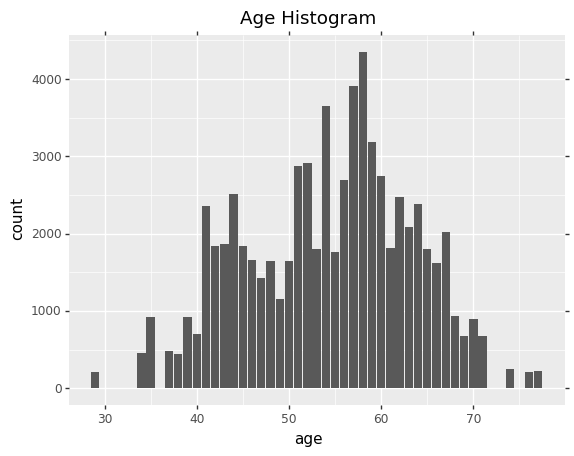

<ggplot: (-9223371892575596158)>

In [8]:
p = ggplot(aes(x='age', fill='age'), data=hospital_temp)
p + geom_bar() + ggtitle("Age Histogram") 

#### Descriptive Statistics for Age:

In [9]:
hospital_temp['age'].describe()

count    70000.000000
mean        54.366386
std          8.999630
min         29.000000
25%         47.000000
50%         55.000000
75%         61.000000
max         77.000000
Name: age, dtype: float64

We can observe minimum age is 29 years, maximum age is 77 years with a mean age of 54 years.

#### Univariate Sex Histogram

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


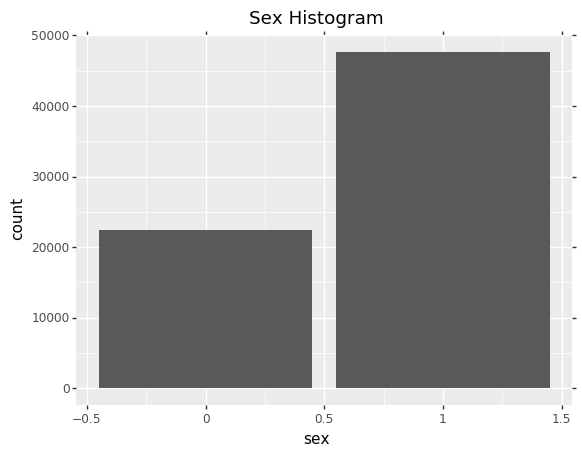

<ggplot: (-9223371892575448853)>

In [10]:
p = ggplot(aes(x='sex', fill='sex'), data=hospital_temp)
p + geom_bar() + ggtitle("Sex Histogram") 

#### Descriptive Statistics (Counts) for Sex:

In [11]:
my_tab = pd.crosstab(hospital_temp['sex'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0,count
sex,
0,22371
1,47629


Observation: We can see there is over double the amount of males to females.

#### Univariate chest pain histogram

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


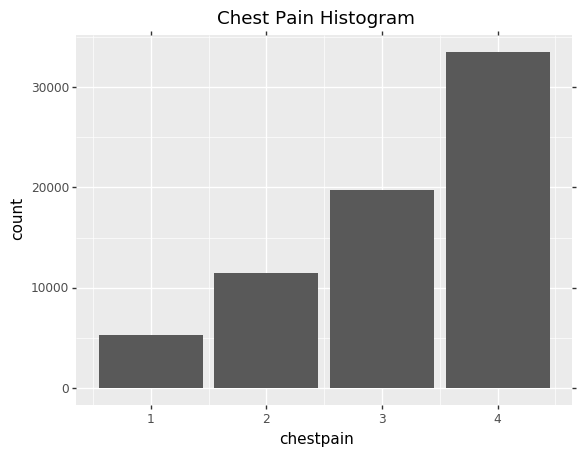

<ggplot: (144279335025)>

In [12]:
p = ggplot(aes(x='chestpain', fill='chestpain'), data=hospital_temp)
p + geom_bar() + ggtitle("Chest Pain Histogram") 

#### Descriptive Statistics (Counts) for Chest Pain status:

In [13]:
my_tab = pd.crosstab(hospital_temp['chestpain'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0,count
chestpain,
1,5302
2,11447
3,19775
4,33476


We can observe asymptomatic chest pain is most common, followed by non-anginal pain, atypical angina and finally typical angina.

#### Univariate of Resting blood pressure in mmHg -  restbps -  histogram

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


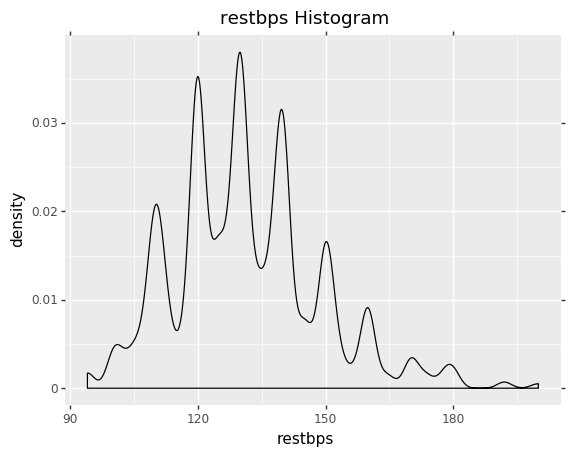

<ggplot: (-9223371892575444599)>

In [14]:
p = ggplot(aes(x='restbps', fill='restbps'), data=hospital_temp)
p + geom_density() + ggtitle("restbps Histogram") 

#### Descriptive Statistics for resting blood pressure

In [15]:
hospital_temp['restbps'].describe(include='all')

count    70000.000000
mean       131.398100
std         17.221978
min         94.000000
25%        120.000000
50%        130.000000
75%        140.000000
max        200.000000
Name: restbps, dtype: float64

We can observe that the maximum resting BP is 200mmHg, minimum is 94mmHg with a mean resting bpm of 131mmHg.

#### Univariate Density Plot of serum cholesterol in mg/dl

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


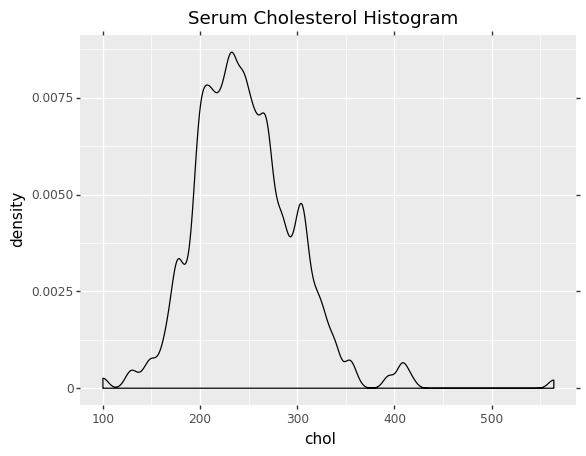

<ggplot: (-9223371892575592672)>

In [16]:
p = ggplot(aes(x='chol', fill='chol'), data=hospital_temp)
p + geom_density() + ggtitle(" Serum Cholesterol Histogram") 

#### Descriptive Statistics for Serum Cholesterol 

In [17]:
hospital_temp['chol'].describe(include='all')

count    70000.000000
mean       246.873214
std         52.438289
min        100.000000
25%        211.000000
50%        243.000000
75%        276.000000
max        564.000000
Name: chol, dtype: float64

We can observe a minimum serum cholesterol of 100, maximum of 564 with a mean of 246. 

Observation 1: It appears that values above 500 may be outliers. However, in the context of serum cholestrol
as level of 300 to 600mg/dL is clinically relevant and may indicate such conditions as familial hypercholesterolemia. On these grounds we will not remove these maximums as outliers as they are clinically relevant though extreme.

#### Histogram of Fasting Blood Sugar levels

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


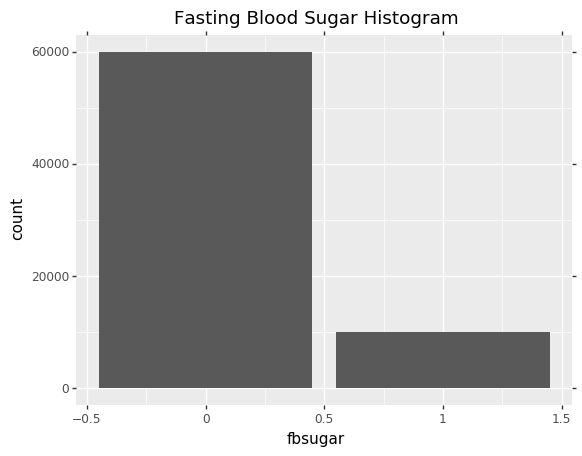

<ggplot: (144279304789)>

In [18]:
p = ggplot(aes(x='fbsugar', fill='fbsugar'), data=hospital_temp)
p + geom_bar() + ggtitle("Fasting Blood Sugar Histogram") 

#### Descriptive Statistics (Counts) for Fasting Blood Sugar Levels

In [19]:
my_tab = pd.crosstab(hospital_temp['fbsugar'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0,count
fbsugar,
0,59950
1,10050


We can observe that a significantly smaller portion of the population have fasting blood sugar > 120mg/dl {1} than 
fasting blood sugar levels less than or equal to 120mg/dl

#### Histogram of Resting ECG Results

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


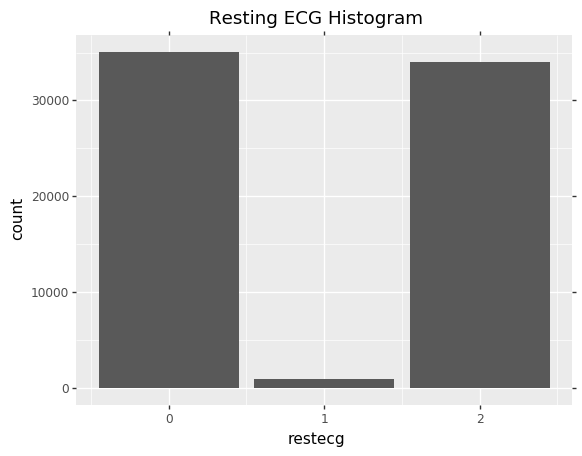

<ggplot: (144149939432)>

In [20]:
p = ggplot(aes(x='restecg', fill='restecg'), data=hospital_temp)
p + geom_bar() + ggtitle("Resting ECG Histogram") 

#### Descriptive Statistics (Counts) for Resting ECG 

In [21]:
my_tab = pd.crosstab(hospital_temp['restecg'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0,count
restecg,
0,35031
1,931
2,34038


We can observe that a large portion of the population have normal resting ECGs and left ventricular hypertrophy with 
a far smaller proportion having ST-T abnormalities.

#### Density plot of Maxiumum Heart Rate

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


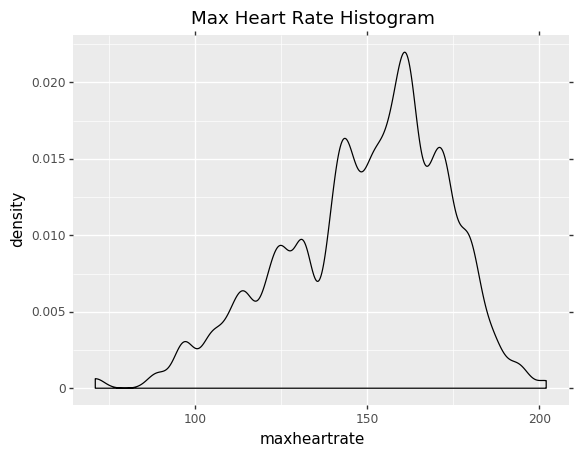

<ggplot: (-9223371892704901586)>

In [22]:
p = ggplot(aes(x='maxheartrate', fill='maxheartrate'), data=hospital_temp)
p + geom_density() + ggtitle("Max Heart Rate Histogram") 

#### Descriptive Statistics for Max Heart Rate

In [23]:
hospital_temp['maxheartrate'].describe(include='all')

count    70000.000000
mean       149.388857
std         23.314058
min         71.000000
25%        132.000000
50%        153.000000
75%        166.000000
max        202.000000
Name: maxheartrate, dtype: float64

We can observe a minimum Max heart rate of 71bpm with a maximum Max heart rate of 202bpm and a mean of 149bpm.

#### Histogram of Exercise-Induced Angina

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


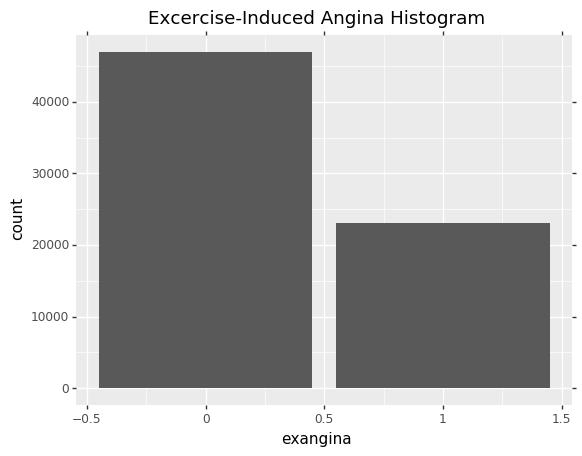

<ggplot: (-9223371892704869702)>

In [24]:
p = ggplot(aes(x='exangina', fill='exangina'), data=hospital_temp)
p + geom_bar() + ggtitle("Excercise-Induced Angina Histogram") 


#### Counts for Exercise-Induced Angina:

In [25]:
my_tab = pd.crosstab(hospital_temp['exangina'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0,count
exangina,
0,46914
1,23086


We can observe that there are far more patients without exercise induced angina {0} than those with {1}.

#### Histogram of thalassesmia Status

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_count : Removed 465 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


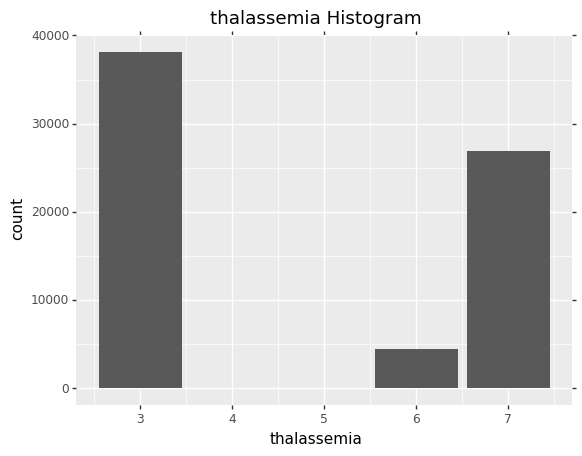

<ggplot: (144149970703)>

In [26]:
p = ggplot(aes(x='thalassemia', fill='thalassemia'), data=hospital_temp)
p + geom_bar() + ggtitle("thalassemia Histogram") 

Observation: We can see that the feature thalassemia is coded as 3,6,7, however, this corresponds with the data dictionary.

#### Counts of thalassemia classification

In [27]:
my_tab = pd.crosstab(hospital_temp['thalassemia'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0,count
thalassemia,
3.0,38096
6.0,4500
7.0,26939


We can observe fixed defects of thalassemia is least common, followed by reversible defect and finally normal status.

#### Histogram of the number of major vessels (0–3) colored by fluoroscopy

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_count : Removed 1039 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


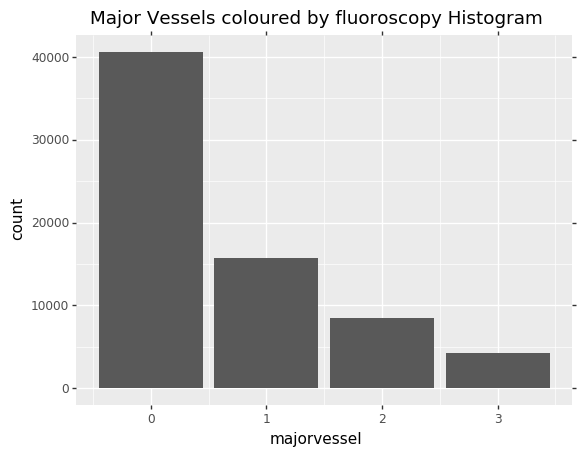

<ggplot: (-9223371892704841128)>

In [28]:
p = ggplot(aes(x='majorvessel', fill='majorvessel'), data=hospital_temp)
p + geom_bar() + ggtitle("Major Vessels coloured by fluoroscopy Histogram") 

#### Counts of number of major vessels (0–3) colored by fluoroscopy

In [29]:
my_tab = pd.crosstab(hospital_temp['majorvessel'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0,count
majorvessel,
0.0,40583
1.0,15671
2.0,8441
3.0,4266


We can observe the most common number is none, followed sequentially by increasing number of major vessels colored by fluoroscopy

#### Histogram of the Peak exercise ST segment characteristic following exercise test

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


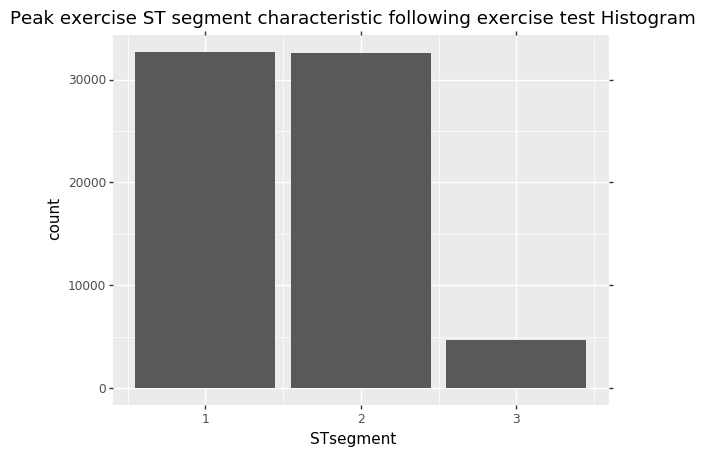

<ggplot: (144150501026)>

In [30]:
p = ggplot(aes(x='STsegment', fill='STsegment'), data=hospital_temp)
p + geom_bar() + ggtitle("Peak exercise ST segment characteristic following exercise test Histogram") 

#### Counts of Peak Exercvise ST Segment Characteristic

In [31]:
my_tab = pd.crosstab(hospital_temp['STsegment'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0,count
STsegment,
1,32658
2,32609
3,4733


We can observe there are far less down-sloping ST segments as compared with groups 1 and 2.

 #### Density plot of ST depression induced by exercise relative to rest

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


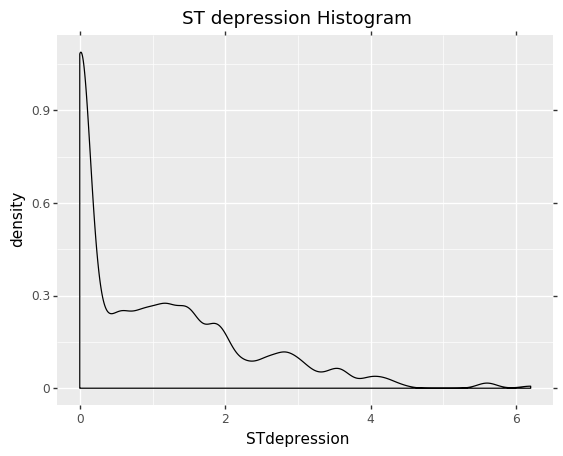

<ggplot: (-9223371892704335742)>

In [32]:
p = ggplot(aes(x='STdepression', fill='STdepression'), data=hospital_temp)
p + geom_density() + ggtitle("ST depression Histogram") 

#### Descriptive statistics of measure of ST Depression

In [33]:
hospital_temp['STdepression'].describe(include='all')

count    70000.00000
mean         1.04636
std          1.17049
min          0.00000
25%          0.00000
50%          0.80000
75%          1.60000
max          6.20000
Name: STdepression, dtype: float64

We can observe that the minimum is 0 thus no ST Depression or myocardial ischemia present, conversely the maximum is 6.2
with a mean of 1.04.

#### Univariate histogram of diagnosis of heart disease (OUTCOME): Displays whether the individual is suffering from heart disease or not  

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


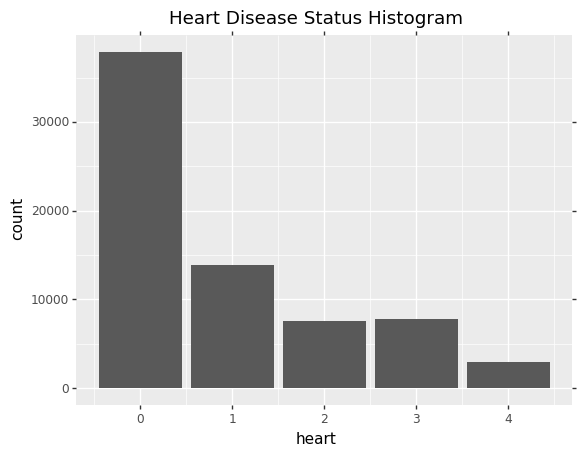

<ggplot: (144150501103)>

In [34]:
p = ggplot(aes(x='heart', fill='heart'), data=hospital_temp)
p + geom_bar() + ggtitle("Heart Disease Status Histogram") 

Observation 2: As this is our outcome and our primary concern is whether a patient is identified as having HD or not,
rather than the degree or severity of the HD we will consider cleaning this outcome variable for a binary rather than multi-level
categorical variable for either having no diagnosed HR heart{0} or having a degree of HR heart{1}. The justification for this is that between levels of heart disease there is considerable variability and imbalance and thus it is likely this would add increased complexity into our model and higher levels of uncertainty in prediction likely hindering our results. With a binary two level classification problem we can better balance our outcome and thus construct a more accurate model.

#### Counts of Heart Disease Status:

In [35]:
my_tab = pd.crosstab(hospital_temp['heart'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0,count
heart,
0,37858
1,13833
2,7567
3,7766
4,2976


We can observe there are nearly as many patients exhibiting some degree of HD as compared with patients not presenting with HD - suggesting a balanced dataset.

### Data Cleaning: Manipulation

#### We will create an alternative outcome variable to our outcome variable - heart -  being a binary variable representing 0 for no HD and 1 for any degree of HD and name it bin_heart. As discussed above, our concern is whether the patient has any degree of HD rather than interest in the specific degree of HD giving us a preference for a binary response rather than multi-level cateogorical. 

In [36]:
hospital_temp.loc[hospital_temp.heart== 0, 'bin_heart'] = 0;
hospital_temp.loc[hospital_temp.heart== 1, 'bin_heart'] = 1;
hospital_temp.loc[hospital_temp.heart== 2, 'bin_heart'] = 1;
hospital_temp.loc[hospital_temp.heart== 3, 'bin_heart'] = 1;
hospital_temp.loc[hospital_temp.heart== 4, 'bin_heart'] = 1;

#### Histogram of Binary Heart Disease Diagnosis 

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


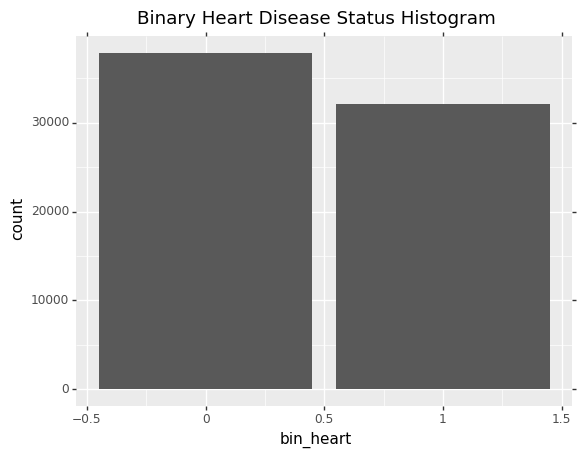

<ggplot: (-9223371892704308883)>

In [37]:
p = ggplot(aes(x='bin_heart', fill='bin_heart'), data=hospital_temp)
p + geom_bar() + ggtitle("Binary Heart Disease Status Histogram") 

#### Count of binary heart response variable for Heart Disease diagnosis:

In [38]:
my_tab = pd.crosstab(hospital_temp['bin_heart'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0,count
bin_heart,
0.0,37858
1.0,32142


Therefore, we can conclude the dataset is slightly imbalanced towards those with an absence of HD - the negative class.

#### Vizualisation of missing data within feature and response variables

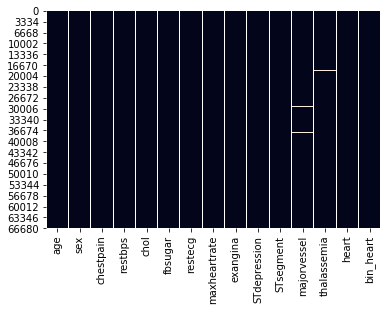

In [39]:
sns.heatmap(hospital_temp.isnull(), cbar=False)

We can observe there are only very few instances of missing values; 
within thalassemia and major vessel fluoroscopy. There does not seem to be any definitive pattern
in how these missing values are distributed although as they will cause issues later on with dimensionality reduction in PCA so we will remove rows with these values from the dataset so we may undertake dimension reductionality.

In [40]:
print("Observations before removing missing data: {}".format(hospital_temp.shape))
hospital_temp = hospital_temp.dropna(axis='rows')
print("Observations after removing missing data: {}".format(hospital_temp.shape))

Observations before removing missing data: (70000, 15)
Observations after removing missing data: (68501, 15)


#### Revizualisation of outcome - Binary Heart Disease Indicator:
We will reassess the extent of imbalance after removing these 1500 rows of missing values

In [41]:
my_tab = pd.crosstab(hospital_temp['bin_heart'],  # Make a crosstab
                              columns="count")      # Name the count column
my_tab

col_0,count
bin_heart,
0.0,36990
1.0,31511


C:\ProgramData\Anaconda3\lib\site-packages\plotnine\scales\scale.py:93: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cbook.iterable(self.breaks) and cbook.iterable(self.labels):
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\utils.py:553: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  return cbook.iterable(var) and not is_string(var)


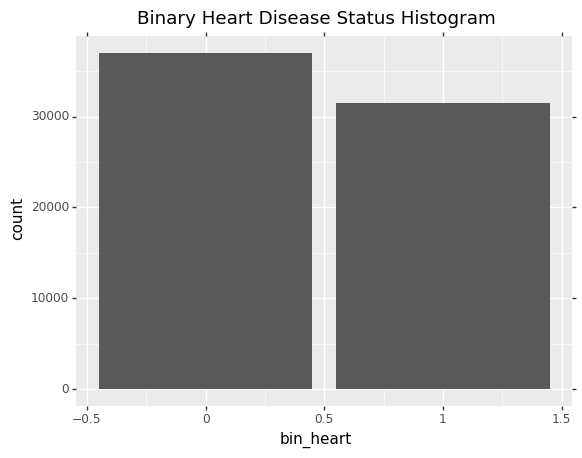

<ggplot: (-9223371892703492359)>

In [42]:
p = ggplot(aes(x='bin_heart', fill='bin_heart'), data=hospital_temp)
p + geom_bar() + ggtitle("Binary Heart Disease Status Histogram") 

We observe we have lost a similar amount of missing values from both the postiive and negative classes with a similar representation between the classes when comparing via a histogram. We thereby lost a small percentage of our data though have allowed PCA dimensionality reduction to be used later on in the analysis process.

#### Descriptive Statistics according to Heart Disease Diagnosis:

In [43]:
#Descriptive Statistic for patients without HD diagnosis:
hospital_temp.loc[hospital_temp.bin_heart== 0, :].describe(include='all')

,age,sex,chestpain,restbps,chol,fbsugar,restecg,maxheartrate,exangina,STdepression,STsegment,majorvessel,thalassemia,heart,bin_heart
count,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000,36990.000000,36990.00000,36990.000000,36990.000000,36990.0,36990.0
mean,52.775020,0.605164,2.832279,129.653906,244.897459,0.136577,0.919519,156.673479,0.196783,0.726380,1.47402,0.381049,3.878670,0.0,0.0
std,9.450288,0.488822,0.937235,16.456347,52.519923,0.343405,0.989734,20.634449,0.397572,0.937365,0.58974,0.755527,1.624013,0.0,0.0
min,29.000000,0.000000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.00000,0.000000,3.000000,0.0,0.0
25%,45.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,146.000000,0.000000,0.000000,1.00000,0.000000,3.000000,0.0,0.0
50%,52.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,160.000000,0.000000,0.400000,1.00000,0.000000,3.000000,0.0,0.0
75%,60.000000,1.000000,4.000000,140.000000,270.000000,0.000000,2.000000,172.000000,0.000000,1.200000,2.00000,0.000000,3.000000,0.0,0.0
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.00000,3.000000,7.000000,0.0,0.0


In [44]:
#Descriptive Statistic for patients with HD diagnosis:
hospital_temp.loc[hospital_temp.bin_heart== 1, :].describe(include='all')

,age,sex,chestpain,restbps,chol,fbsugar,restecg,maxheartrate,exangina,STdepression,STsegment,majorvessel,thalassemia,heart,bin_heart
count,31511.000000,31511.000000,31511.000000,31511.000000,31511.000000,31511.000000,31511.000000,31511.000000,31511.000000,31511.000000,31511.000000,31511.000000,31511.000000,31511.000000,31511.0
mean,56.393069,0.763384,3.546603,133.627622,249.589889,0.154295,1.070229,140.661166,0.487005,1.440506,1.756942,0.982895,5.762337,1.998604,1.0
std,7.982398,0.425011,0.833664,17.934507,52.678509,0.361237,0.991292,23.471232,0.499839,1.297956,0.603897,0.982031,1.765920,1.021414,0.0
min,29.000000,0.000000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,1.0
25%,52.000000,1.000000,3.000000,120.000000,212.000000,0.000000,0.000000,125.000000,0.000000,0.200000,1.000000,0.000000,3.000000,1.000000,1.0
50%,57.000000,1.000000,4.000000,130.000000,248.000000,0.000000,2.000000,143.000000,0.000000,1.200000,2.000000,1.000000,7.000000,2.000000,1.0
75%,62.000000,1.000000,4.000000,142.000000,282.000000,0.000000,2.000000,160.000000,1.000000,2.200000,2.000000,2.000000,7.000000,3.000000,1.0
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.0


#### Descriptive Statistics by positive or negative Heart Disease diagnosis

Overall, we can observe that patients diagnosed with heart disease tend to have higher values for all features (including more positive classes for categorical features),
besides max heart rate which has a lower mean for non-heart disease patients.


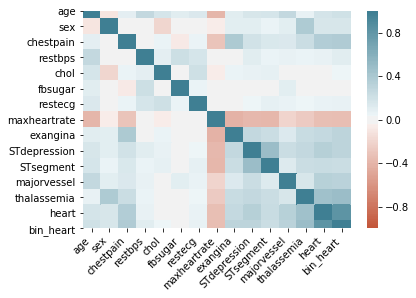

In [45]:
corr_matrix = hospital_temp.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We can see that max heart rate and age are strongly negatively correlated, aswell as max heart rate and chest pain and numerous other features compared with max heart rate - this is not surprising considering its clinical relevance and shared properities with these other cardiac related features and further highlights this feature from the previous statistical comparison between outcome classes as being of interest. We can also observe that ST Depression and ST segment are both correlated. Overall, we can see there is varying degrees of correlation throughout the dataset, with this again being not surprising considering the homeostatic-interactive nature of these indicators within the cardiorespiratory system on a biological level and as contributors, measures and confounders of Heart Disease. With no obvious points for grouping of features we will take this varying correlation as an indicator for undertaking a Principal Components Analysis (PCA) for dimension reduction in reducing any redundancy within the dataset through reducing importance on features which describe similar properities and thereby with variance in different classes being uninformative or redundant. Furthermore, this will result in a reduction in dimensionality allowing for more efficient fitting of the model through PCA  and is a common-practice method for improved classification results in classification problems. Thus we will apply this dimensionality reduction method.


Furthermore, we can observe thast chest pain, thalassemia and maxheartrate are all rather correlated to our binary outcome bin_heart and between one another. Thus we will plot multi-variate plots of these three variables to vizualise these relationship:

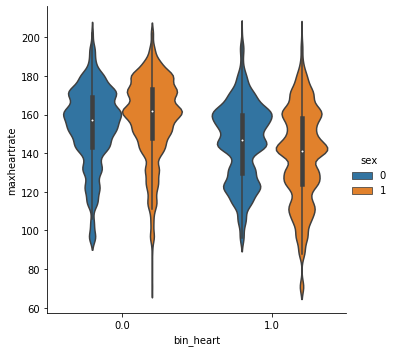

In [46]:
sns.catplot(x="bin_heart", y="maxheartrate", hue="sex", kind="violin", data=hospital_temp);

We can observe that the mean maximum heart rate is higher among females than males and lower amongst those diagnosed with HD than those without a HD diagnosis.


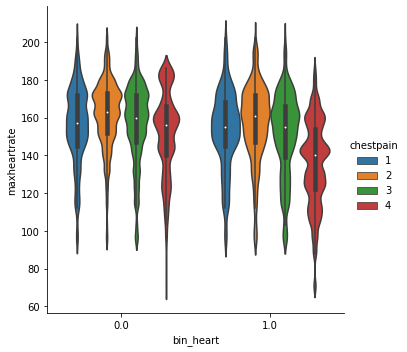

In [47]:
sns.catplot(x="bin_heart", y="maxheartrate", hue="chestpain", kind="violin", data=hospital_temp);

We can observe that those with asymptomatic chest pain tend to have lower maximum heart rates compared with other groups,
with this being similar between HD diagnosis groups.

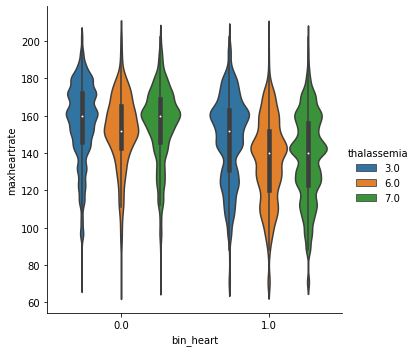

In [48]:
sns.catplot(x="bin_heart", y="maxheartrate", hue="thalassemia", kind="violin", data=hospital_temp);

We can observe that maximum heart rate is lower amongst patients with HD and more so with patients with HD and fixed defects
by thalassemia.

This further emphasises the correlations between these correlated variables and maxium heart rate in general and thus possible redundancy with these features due to representing shared properities or explaining similar components of variance within the dataset and between our outcome groups, highlighting 
the likely benefit of applying PCA dimensionality reduction.

### Creating dummy variables (hot-encoding) for categorical variables and creating final cleaned dataset - redfern_hospital
For categorical variables with more than two-levels (i.e. not including categorical variables with two levels only being 0 and 1 - as these are already technically in dummy variable format) to being meaningfully and accurately represented in the model we will use one-hot encoding to clean/prepare these categorical variables for the modelling process and create a final cleaned dataset - redfern_hospital - as our final dataset ready for the modelling process. These categoricals are Chestpain, restecg, STsegment and Thalassemia

In [49]:
#creating hot-encoded dummy variables:
dummies_chestpain= pd.get_dummies(hospital_temp['chestpain'])
dummies_restecg= pd.get_dummies(hospital_temp['restecg'])
dummies_STsegment= pd.get_dummies(hospital_temp['STsegment'])
dummies_thalassemia= pd.get_dummies(hospital_temp['thalassemia'])

In [50]:
#cleaning hot-encoded dummy variables by correcting column names:
dummies_chestpain.columns = ['typical_angina', 'atypical_angina', 'non‐anginal_angina', 'asymptotic_angina']
dummies_restecg.columns = ['normal_rECG', 'ST_abnormality_rECG', 'LVH_rECG']
dummies_STsegment.columns = ['upslope_ST', 'flat_ST', 'downslope_ST']
dummies_thalassemia.columns = ['normal_thal', 'fixed_thal', 'reversible_thal']

In [51]:
#Joining cleaned dummy variables to hospital_temp dataset:
hospital_temp=hospital_temp.join(dummies_chestpain)
hospital_temp=hospital_temp.join(dummies_restecg)
hospital_temp=hospital_temp.join(dummies_STsegment)
hospital_temp=hospital_temp.join(dummies_thalassemia)

In [52]:
#removing uncleaned corresponding categorical variables for final dataset redfern_hospital:
redfern_hospital = hospital_temp.drop(['chestpain','restecg', 'STsegment', 'thalassemia', 'heart'], axis=1)
#redfern_hospital.info()

As we can see all features and our outcome is now cleaned and ready for the modelling process, although our binary outcome - bin_heart and majorvessel and are floats where it should be a integer as floats types may be too large for PCA:

In [53]:
redfern_hospital = redfern_hospital.astype({'bin_heart':'int64', 'majorvessel':'int64'})
#redfern_hospital.info()

### Seperating target (outcome) from features

In [54]:
y = redfern_hospital['bin_heart']

In [55]:
X = redfern_hospital.drop(['bin_heart'], axis=1)

### Splitting the data into training and test sets
We will use 80% as training data and 20% as the test set.

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

### Scaling the dataset for PCA and subsequent models

We will standardize the data as PCA is sensitive to scale, particularly variance, using the StandardScaler to scale features to a normal distribution with variance of 1 and mean of 0 - subsequent models will also benefit from this scaling.

In [57]:
#Creating a scaler object
scaler = StandardScaler()
# Fitting on training set only.
scaler.fit(X_train)
# Applying scaler transformation to both the training and the test set.
Scaled_X_train = scaler.transform(X_train)
Scaled_X_test = scaler.transform(X_test)

### Importing and applying PCA dimensionality reduction:
We will choose the minimum number of principal components that will ensure 95% of the variance explaining the data is retained.

In [58]:
from sklearn.decomposition import PCA
# creating a PCA instance model 
pca_model = PCA(n_components = 0.95, random_state=0)
#Fitting the fitted PCA model on training set only.
pca_model.fit(Scaled_X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

In [59]:
print(pca_model.n_components_)

16


[0.18059009 0.28125625 0.36041811 0.42945802 0.49545669 0.55485529
 0.60889154 0.6599344  0.70845702 0.75425268 0.79492804 0.83459898
 0.86918655 0.90176053 0.93239886 0.95798207]


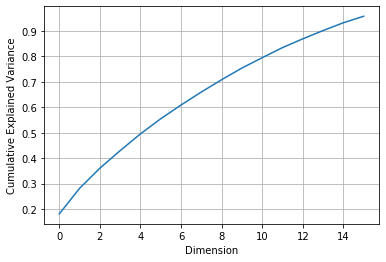

The Minimum number of dimensions that explain 95% of the data variance is : 16


In [60]:
# Plotting the cumulative sum of explained variance from the fitted PCA model.
cumulative_sum = np.cumsum(pca_model.explained_variance_ratio_)
print(cumulative_sum)
plt.plot(cumulative_sum)
plt.xlabel('Dimension')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Computing the minimum number of dimensions (d) that explain 95% of the data variance
d = np.argmax(cumulative_sum >= 0.95)+1
print("The Minimum number of dimensions that explain 95% of the data variance is : {}".format(d))


In [61]:
# Applying PCA transformations to both the training and the test set.
Reduced_X_train = pca_model.transform(Scaled_X_train)
Reduced_X_test = pca_model.transform(Scaled_X_test)

From this PCA analysis we can conclude that 95% of the variance of the dataset is explained by 16 Principal Components, thereby allowing us to significantly reduce the dimensions of the dataset (which was greatly increased by hot-encoding categorical variables) to only 16 dimensions whilst still retaining important information captured by the variance within all important features whilst significantly reducing redundancy turning these into different representations of the data. This will ultimately allow our more complex and costly models to be run more efficiently and hopefully maximise the accuracy of our models.

## Choosing a model, Training, Evaluation, Hyperparameter Tuning and Prediction
For this stage we will train five models in total; a linear model, a Decision Tree model, a Support Vector Machine, A Artifical Neural Network and finally a fifth model depending on the results of our best model from the first four models trained and evaluated. Throughout this assessment we will use accuracy as our metric for cross-validation scoring and evaluation for obtaining best parameters for each model. With this being a reliable indicator of predictive performance in making correct classifications of Heart Disease of our models on a dataset which is overall balanced. If the dataset was significantly imbalanced,however, then we would have considered using a more robust metric such as an F1 score.

## 1. Choosing a model, Training, Evaluation, Hyperparameter Tuning and Prediction - Logistic Regression

### Justification of Logistic Regression as choice for linear model: 

First we will apply a default Logistic regression model to both our reduced PCA training data and our scaled only training dataset seperately and compare these to see which data processing method improves accuracy the most with a 5-fold CV - we will then use the best performing processed data to apply to our logistic regression model with hyperparameter tuning to find the best model.

##### Assessing accuracy of default Logistic Regression model on standardised only dataset:
As this is a classification task, we have decided logistic regression is the most appropriate of available linear models. Whether L1 or L2 regularization or none at all are used will be determined by which produces the best accuracy and the trade off with interpretation.


In [62]:
Log_Reg_default = LogisticRegression()
#Fitting the default Model with our standardised only training data
Log_Reg_default.fit(Scaled_X_train, y_train)
print("Best accuracy score: {:.2f}".format(Log_Reg_default.score(Scaled_X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best accuracy score: 0.81


##### Assessing accuracy of default Logistic Regression model on standardised and dimensionality reduced (PCA) dataset:


In [63]:
Log_Reg_default2 = LogisticRegression() 
#Fitting the GridSearchCV default Model with our standardised only training data
Log_Reg_default2.fit(Reduced_X_train, y_train)
print("Best accuracy score: {:.2f}".format(Log_Reg_default2.score(Reduced_X_test, y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best accuracy score: 0.82


#### Therefore, we can see the dimensionally-reduced data only slightly increases accuracy, thus we will use the standardized only dataset with our logistic regression parameter search to emphasis interpretability, as our high-dimensional PCA dataset has greatly reduced interpretability for most of our models.

In [67]:
#creating logistic regression model object for passing into pipe object
Log_Reg = LogisticRegression()

# Intiating pipeLine object with standardization and logistic model as arguements for pipe to sequentially
#fit the Log_Reg model and allow easy customisation in the future of the model if additional functionality needs to be added to the pipe.
pipe = Pipeline([('Estimator', Log_Reg)])

In [68]:
#Creating a parameter dictionary variable for inputting as an arguement to our GridSearchCV object for parameter search
#of all possible iterations of C and class_weight parameters for our logistic regression model.
param_grid = {'Estimator__C': [0.001, 0.01, 0.1, 1, 10, 100], 
'Estimator__class_weight':['balanced',{0:0.1, 1:0.9}, {0:0.2, 1:0.8}, {0:0.3, 1:0.7}, {0:0.4, 1:0.6},{0:0.5, 1:0.5},
                          {0:0.9, 1:0.1}, {0:0.8, 1:0.2}, {0:0.7, 1:0.3}, {0:0.6, 1:0.4}], 
             'Estimator__penalty':['l1', 'l2']}

In [69]:
#Initialising a GridSearchCV object which will take our pipeline object and parameter_grid variable as arguements
Grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

In [70]:
#Fitting the GridSearchCV Model with our training data
Grid_search.fit(Scaled_X_train, y_train)
#Printing the best parameters after completeing a grid search for , regularization, C and class_weight parameters with
#an internal 5-fold cross validation using a logistic regression model and standardised training data with validation data
print("Best parameters: {}".format(Grid_search.best_params_))
#Printing the best parameters after completeing a grid search for both C and class_weight parameters with
#an internal 5-fold cross validation using a logistic regression model and standardised training data with validation data
print("Best cross-validation score: {:.2f}".format(Grid_search.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best parameters: {'Estimator__C': 0.001, 'Estimator__class_weight': {0: 0.4, 1: 0.6}, 'Estimator__penalty': 'l1'}
Best cross-validation score: 0.82


In [71]:
print("Saving best parameter logistic regression model")
pickle.dump( Grid_search, open( "Best_logistic_regression_model.pkl", "wb" ) )
print("Model has been saved to Best_logistic_regression_model.pkl in working directory ")


Saving best parameter logistic regression model
Model has been saved to Best_logistic_regression_model.pkl in working directory 


In [66]:
#Loading in the best logistic model:
logistic_model=pickle.load(open("Best_logistic_regression_model.pkl","rb"))

We can see that logistic regression with L1 Regularization, slightly biased class weights towards the positive class and C parameter of 0.001 returns the 
maximum accuracy score of 0.82 for the model based on the non-PCA training data.

Confusion matrix:
[[6312 1086]
 [1390 4913]]



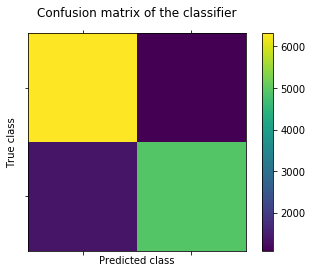

In [72]:
#Creating prediction variable for constructing confusion matrix
ypred = logistic_model.predict(Scaled_X_test)

#Creating confusion matrix
confusion = confusion_matrix(y_test, ypred)
print("Confusion matrix:\n{}\n".format(confusion))

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

 <INSERT-INTERPRETATION-HERE>

In [73]:
#Using default accuracy scoring from logistic regression estimator to get score from the model created by Grid_Search.
print("Accuracy: {}\n".format(logistic_model.score(Scaled_X_test,y_test)))

#Calculating F1 score for best model and parameters with test data.
print("f1 score: {:.2f}\n".format(f1_score(y_test, ypred)))

#Calculating precision through summarising classification report function
print(classification_report(y_test, ypred))

from sklearn.metrics import roc_auc_score
#Calculating AUC/ROC for the best grid_search model trained on whole data and tested on testset. 
#predicting with output as probability of class allocation for each observation:
y_pred_proba = logistic_model.predict_proba(Scaled_X_test)[:,1]
#Calcutating the AUC score for the model:
print("AUC score is:\n{}\n".format(roc_auc_score(y_true = y_test, y_score = y_pred_proba)))

Accuracy: 0.8192832639953288

f1 score: 0.80

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      7398
           1       0.82      0.78      0.80      6303

    accuracy                           0.82     13701
   macro avg       0.82      0.82      0.82     13701
weighted avg       0.82      0.82      0.82     13701

AUC score is:
0.8631952167544071



## Result of Logistic Regression with L1 Regularization:
We can see the test accuracy is 0.81% with F1 score of 0.80. This not surprising as we can observe that both false positives and false negatives are roughly balanced although the logistic model seems to be more biased towards negative classifications of no HD diagnosis at 1390 false negatives as opposed to 1086 false positives. We can see the ROC score is high at 0.86 reflecting the trade-off between sensitivity (TPR) and specificity (1 – FPR) and again confirming an overall good result for predictive accuracy for the logistic regression model.


## 2. Choosing a model, Training, Evaluation, Hyperparameter Tuning and Prediction - Random Forest

### Justification of Random Forest as Choice for Decision Tree Model: 
In this case, from available Decision Tree Methods we have chosen the Random Forest Model. The reasoning behind this was that the goal of the study is more so interested in the predictive accuracy than interpretation. The Decision Tree Classifier model would provide good interpretation and reasoning behind the models assumptions and results. However, may not fair as well as a stacked ensemble decision tree method such as Random Forest. Thus, for predictive power and avoiding overfitting (a commmon issue in Decison Tree Classifiers) we have chosen to use these generalizable predictive models, which provide less interpretation although will likely generalize better and provide a greater degree of accuracy, though without being a computationally taxing as a more complex ensembled decision tree algorithm as XG Boost or other Gradient Boosted Trees.

First we will apply a default Random Forest model to both our reduced PCA training data and our scaled only training dataset seperately and compare these to see which data processing method improves accuracy the most with a 5-fold CV - we will then use the best performing processed data to apply to our Random Forest model with hyperparameter tuning to find the best model.

##### Assessing accuracy of default Random Forest Model on standardised only dataset:

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_default = RandomForestClassifier()
#Fitting the default Model with our standardised only training data
forest_default.fit(Scaled_X_train, y_train)
print("Best accuracy score: {:.2f}".format(forest_default.score(Scaled_X_test,y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best accuracy score: 0.83


##### Assessing accuracy of default Random Forest model on standardised and dimensionality reduced (PCA) dataset:


In [69]:
forest_default2 = RandomForestClassifier()
#Fitting the default Model with our standardised only training data
forest_default2.fit(Reduced_X_train, y_train)
print("Best accuracy score: {:.2f}".format(forest_default2.score(Reduced_X_test,y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Best accuracy score: 0.81


#### Therefore, we can see the dimensionally-reduced data through PCA provides a poorer default accuracy and thus we will use the scaled only dataset instead during our hyperparameter search for the best Random Forest model with the highest degree of interpretability.

In [71]:
#creating random forest model object for passing into pipe object
forest = RandomForestClassifier()

# Intiating pipeLine object with standardization and random forest as arguements for pipe to sequentially
#fit the model and allow easy customisation in the future of the model if additional functionality needs to be added to the pipe.
pipe2 = Pipeline([('Estimator', forest)])


In [74]:
#Creating a parameter dictionary variable for inputting as an arguement to our GridSearchCV object for parameter search
#of all possible iterations of parameters for our Random Forest model.
param_grid2 = {'Estimator__class_weight':[{0: 0.4, 1: 0.6},{0: 0.3, 1: 0.7}, {0: 0.2, 1: 0.8},
               'balanced'], 
              'Estimator__max_depth':[3,5,8,10], 'Estimator__n_estimators':[500, 1000, 1500],
              'Estimator__max_features':['sqrt', 'log2']}

In [76]:
#Initialising a GridSearchCV object which will take our pipeline object and parameter_grid variable as arguements
Grid_search2 = GridSearchCV(pipe2, param_grid2, cv=5, n_jobs=-1)
#Fitting the GridSearchCV Model with our training data
Grid_search2.fit(Scaled_X_train, y_train)
#Printing the best parameters after completeing a grid search for parameters with
#an internal 5-fold cross validation using a Random Forest model and standardised training data with validation data
print("Best parameters: {}".format(Grid_search2.best_params_))
#Printing the best parameters after completeing a grid search for both C and class_weight parameters with
#an internal 5-fold cross validation using a logistic regression model and standardised training data with validation data
print("Best cross-validation score: {:.2f}".format(Grid_search2.best_score_))

Best parameters: {'Estimator__class_weight': {0: 0.4, 1: 0.6}, 'Estimator__max_depth': 10, 'Estimator__max_features': 'log2', 'Estimator__n_estimators': 500}
Best cross-validation score: 0.85


In [77]:
import pickle
print("Saving best parameter Random Forest model")
pickle.dump( Grid_search2, open( "Best_RandomForest_model.pkl", "wb" ) )
print("Model has been saved to Best_RandomForest_model.pkl in working directory ")

Saving best parameter Random Forest model
Model has been saved to Best_RandomForest_model.pkl in working directory 


In [74]:
#Loading in the best random forest model:
Random_forest_model=pickle.load(open("Best_RandomForest_model.pkl","rb"))

Confusion matrix:
[[6432  966]
 [1171 5132]]



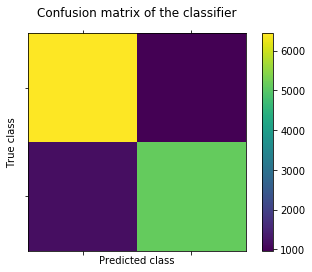

In [75]:
#Creating prediction variable for constructing confusion matrix
ypred = Random_forest_model.predict(Scaled_X_test)

#Creating confusion matrix
confusion = confusion_matrix(y_test, ypred)
print("Confusion matrix:\n{}\n".format(confusion))

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [76]:
#Using default accuracy scoring from Random Forest estimator to get score from the model created by Grid_Search.
print("Accuracy: {}\n".format(Random_forest_model.score(Scaled_X_test,y_test)))

#Calculating F1 score for best model and parameters with test data.
print("f1 score: {:.2f}\n".format(f1_score(y_test, ypred)))

#Calculating precision through summarising classification report function
print(classification_report(y_test, ypred))

#Calculating AUC/ROC for the best grid_search model trained on whole data and tested on testset. 
#predicting with output as probability of class allocation for each observation:
y_pred_proba = Random_forest_model.predict_proba(Scaled_X_test)[:,1]
#Calcutating the AUC score for the model:
print("AUC score is:\n{}\n".format(roc_auc_score(y_true = y_test, y_score = y_pred_proba)))

Accuracy: 0.8440259835048537

f1 score: 0.83

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      7398
           1       0.84      0.81      0.83      6303

    accuracy                           0.84     13701
   macro avg       0.84      0.84      0.84     13701
weighted avg       0.84      0.84      0.84     13701

AUC score is:
0.906342493567497



## Results of Random Forest Model:
As compared with our logistic Regression model, we can observe that the final Random Forest (RF) model has higher accuracy and F1 score overall, and further has reduced both false negatives and false positives, though like the logistic regression model still being slightly biased towards negative classifications rather than positive classifications. Finally, the ROC is significantly higher at 0.906 indicating an increase in general predictive accuracy though with less interpretability as the logistic regression model, though with weightings of importance obtainable if this is considered the most appropriate and accurate model for our goal of prediction of HD. Overall, we can see for these purposes the RF model is more superior than the logistic regression model overall.

## 3. Choosing a model, Training, Evaluation, Hyperparameter Tuning and Prediction - Support Vector Machine (SVM)

In this case we will use our dimensionally reduced PCA dataset for the best performing processed data to apply our SVM model with hyperparameter tuning to find the best model most efficently. This is due to computationaly efficiency from dimensionality reduction (PCA) and secondly the SVC interpretability is relatively poor in comparison to our earlier logistic and decision-Tree based models thus there will not be significant benefit in terms of interpretability in using the standardised only data. Furthermore, due to limitations in computing power by the research team we have opted for using the google cloud computing platform namly a virtual engine instance based on n1-standard-8 machine type, that is 8 CPUs. Prior to using google cloud platform on the datalab, we were unable to run the model efficently and recieve an output with the below settings. The results from the cloud computation have been added in and the code used is as below.

In [86]:
from sklearn.svm import SVC
from scipy.stats import expon
from sklearn.pipeline import Pipeline
#creating random forest model object for passing into pipe object
SVM = SVC(probability=True)

# Intiating pipeLine object with standardization and random forest as arguements for pipe to sequentially
#fit the model and allow easy customisation in the future of the model if additional functionality needs to be added to the pipe.
pipe3 = Pipeline([('Estimator', SVM)])

In [ ]:
#Creating a parameter dictionary variable for inputting as an arguement to our GridSearchCV object for parameter search
#of all possible iterations of kernels, gamma, C parameters for our SVC model.
parameter_distribution = {'Estimator__C': expon(scale=10), 'Estimator__gamma': expon(scale=1/30), 
                          'Estimator__kernel': ['rbf'], 'Estimator__class_weight':['balanced', None]}

In [ ]:
random_searchSVC = RandomizedSearchCV(pipe3, parameter_distribution,cv=3,n_iter=10)
random_searchSVC.fit(Reduced_X_train, y_train)
#Printing the best parameters after completeing a randomised grid search for parameters with
#an internal 3-fold cross validation using a SVC classification model and standardised, reduced training data 
#with validation data.
print("Best parameters: {}".format(random_searchSVC.best_params_))
#Printing the best parameters after completeing a randomised search for both C and class_weight parameters with
#an internal 3-fold cross validation using a SVC classification model and standardised training data with validation data
print("Best cross-validation score: {:.2f}".format(random_searchSVC.best_score_))

### Best Parameters of SVC from Cloud Computation:

Best parameters: {'Estimator__class_weight': 'balanced', 'Estimator__kernel': 'rbf', 'Estimator__gamma': 0.01726208510783589, 'Estimator__C': 5.314673957933001}

Best cross-validation score: 0.84

In [ ]:
print("Saving best parameter SVM model")
pickle.dump(random_searchSVC, open( "Best_SVM_model.pkl", "wb" ) )
print("Model has been saved to Best_SVM_model.pkl in working directory ")


In [31]:
#Loading in the best SVM model:
SVM_model=pickle.load(open("Best_SVM_model.pkl","rb"))

### Results of SVC from Google Cloud Computation using n1-standard-8 machine:
Note: The same code in the document was used in a google datalab jupyter environment to obtain the below outputs from best models in the above parameter search. Unfortunately, we were not able to save this final model from the cloud using pickle and import this pickle file to use directly within this project file. This is the justification for copying in outputs in this manner. Alternatively if you run the model fitting above, you will also return the same result though these searches will be costly and timely without a machine with CPU capacity greater than 8.

If running above code for model output uncomment the below two statements to create confusion matrix and comment out default confusion matrix.

In [ ]:
#CONFUSION MATRIX FROM RUNNING ABOVE CODE:

#Creating prediction variable for constructing confusion matrix
#ypred = xgb_search.predict(Reduced_X_test)

#Creating manual confusion matrix with results from cloud computed output:
#confusion = confusion_matrix(y_test, ypred)

If not running above models that use default confusion matrix with inputted values from cloud computation of the above model fitting code:

Confusion matrix:
[[6522, 876], [1361, 4942]]



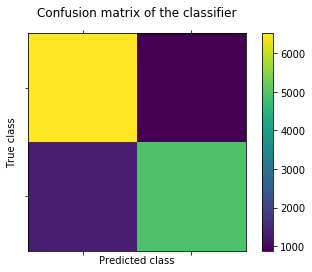

In [85]:
#DEFAULT CONFUSION MATRIX FROM CLOUD COMPUTATION OF ABOVE CODE:

confusion =  [[6522, 876],
              [1361, 4942]]
print("Confusion matrix:\n{}\n".format(confusion))


import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [ ]:
#Using default accuracy scoring from SVC estimator to get score from the model created by the random search.
print("Accuracy: {}\n".format(SVM_model.score(Reduced_X_test,y_test)))

#Calculating F1 score for best model and parameters with test data.
print("f1 score: {:.2f}\n".format(f1_score(y_test, ypred)))

#Calculating precision through summarising classification report function
print(classification_report(y_test, ypred))
from sklearn.metrics import roc_auc_score
#Calculating AUC/ROC for the best grid_search model trained on whole data and tested on testset. 
#predicting with output as probability of class allocation for each observation:
y_pred_proba = SVM_model.predict_proba(Reduced_X_test)[:,1]
#Calcutating the AUC score for the model:
print("AUC score is:\n{}\n".format(roc_auc_score(y_true = y_test, y_score = y_pred_proba)))

Accuracy: 0.8367272461864097

f1 score: 0.82

             precision    recall  f1-score   support

          0       0.83      0.88      0.85      7398
          1       0.85      0.78      0.82      6303
          T       0.84      0.84      0.84     13701

ROC score is:
0.8726357879075679

### Summary of SVC:
Firstly, a major consideration in analysing the results of the SVC model on the dataset is that due to computational limitations even when implementing training through the cloud with a n1-standard-8 machine the parameter search was reduced through the application of a Randomised rather than brute-force grid search. This means that rather than assessing all key perturbations of parameters together in all combinations and taking the best CV result, we rather set a limit on iterations of random sampling from the parameter space. Thus as compared with the two prior models the likelihood of reaching the optima for parameters was far reduced and thus for our computational ability and with the resources available this is the best SVC that could be trained on the Redfern hospital data, although it should be considered that with greater computational resources and a better optimized hyperparameter search we could likely find a better performing SVC model.

With this limitation considered, the results of our best trained SVC model is superior in predictive power than the logistic regression model though poorer than the Random Forest model. With interpretation being reduced due to reliance on the PCA reduced dataset. This is illustrated by a ROC of 0.87 and F1 score of 0.82. We can see that the bias towards false negatives is increased as compared with the logistic regression model and more so when compared with the RF model. This suggests that the best trained SVC model is not as appropriate as a predictive model to the RF.

## 4. Choosing a model, Training, Evaluation, Hyperparameter Tuning and Prediction - Artifical Neural Network

We will not apply a default ANN model to both our reduced PCA training data and our scaled only training dataset seperately due to computation limitations as we have done previously with other models (linear and decision tree) as ANN's are highly computationally-taxing models to build and have inheritantly poor interpretability due to significant model complexity thus the PCA reduced dataset will likely be of most benefit in the deep learning context and with our resources using only one dataset will be the best allocation of our resources. Furthermore, Google cloud was again implemented to obtain our results for the ANN model to increase computational ability for training.

In [ ]:
#Creating a function for input into a KerasClassifier wrapping function to allow the model to be usable within sklearn
def create_network(neurons=5,drop_rate_input=0.0, drop_rate_hidden1=0.0, drop_rate_hidden2=0.0):
    # creating the neural network model object with two parameters for independant dropout rates for two independant
    # layers the input layer and hidden layer of the neural network
    network = models.Sequential()
    
    #initalizing First input layer:
    network.add(layers.Dense(input_dim=16, output_dim=8,activation='relu'))
    #Adding a dropout regularization layer between the input and first hidden layer with input drop_rate_input parameter
    #using probability 'drop_rate_input' (p) to determine if output of input layer will be converted to 0 for specific input neuron
    #of an interation of forward feed/back propogation
    network.add(Dropout(drop_rate_input))
    
    #initializing first hidden layer:
    network.add(layers.Dense(output_dim=4,activation='relu'))
    #Simiarly adding a second dropout regularization layer between 1st hidden layer and output layer with input drop_rate_hidden parameter
    #to dropout regularize with probability 'drop_rate_hidden1' :
    network.add(Dropout(drop_rate_hidden1))

    
    #initializing second hidden layer to output:
    network.add(Dense(output_dim=1, kernel_initializer='uniform', activation='sigmoid'))
    # Compiling the aritifical neural network with input parameters:
    network.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])    
    return network

In [66]:
from keras.wrappers.scikit_learn import KerasClassifier
#Wrapping the returned ANN from create_network function to allow for implementation into sklearns param_grid:
network=KerasClassifier(build_fn=create_network, verbose=0)

In [67]:
#Defining our parameter random search variables for tuning of key complimentary parameters:
#Batch size/number of neurons specified with the last model:
#creating an independant parameter search variable for the first
#input layer output for the drop regularization probability of the input layer only.
drop_rate_input=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]
#creating an independant parameter search variable for the first
#hidden layer1 output for the drop regularization probability of the hidden layer only.
drop_rate_hidden1=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]
#Note: these parameters for dropout rates have been specified independantly to allow the 
#grid search to search over the most optimal drop out probabilities for each
#dropout layer independantly of other layers for an optimal solution and idea of which layers 
#dropped out may be most useful. 
neurons=[5,10,15]
batch_size=[50,100,150]
epochs=[50,100, 150]


In [68]:
#Creating a parameter grid dictionary for random sampled hyperparameter tuning:
param_grid4 = dict(batch_size=batch_size, epochs=epochs, drop_rate_hidden1=drop_rate_hidden1,
                 
                  drop_rate_input=drop_rate_input,neurons=neurons
                  )

In [ ]:
random_searchANN = RandomizedSearchCV(estimator=network, param_distributions=param_grid4,cv=3,n_iter=10)
random_searchANN.fit(Reduced_X_train, y_train)
#Printing the best parameters after completeing a randomised grid search for parameters with
#an internal 3-fold cross validation using a ANN classification model and standardised, reduced training data
#with validation data
print("Best parameters: {}".format(random_searchANN.best_params_))
#Printing the best parameters after completeing a randomised search for ANN parameters with
#an internal 3-fold cross validation using a ANN classification model and standardised, reduced training data 
#with validation data
print("Best cross-validation score: {:.2f}".format(random_searchANN.best_score_))

### Best Parameters of ANN from Cloud Computation:
Best parameters: {'batch_size': 150, 'drop_rate_hidden1': 0.1, 'epochs': 150, 'drop_rate_input': 0.0, 'neurons': 15}

Best cross-validation score: 0.84

In [ ]:
print("Saving best parameter ANN model")
pickle.dump( random_searchANN, open( "Best_ANN_model.pkl", "wb" ) )
print("Model has been saved to Best_ANN_model.pkl in working directory ")

#Loading in the best ANN model:
random_searchANN=pickle.load(open("Best_ANN_model.pkl","rb"))

### Results of ANN from Google Cloud Computation using n1-standard-8 machine:
Note: The same code in the document was used in a google datalab jupyter environment to obtain the below outputs from best models in the above parameter search. Unfortunately, we were not able to save this final model from the cloud using pickle and import this pickle file to use directly within this project file. This is the justification for copying in outputs in this manner. Alternatively if you run the model fitting above, you will also return the same result though these searches will be costly and timely without a machine with CPU capacity greater than 8.

If running above code for model output uncomment the below two statements to create confusion matrix and comment out default confusion matrix.

In [ ]:
#CONFUSION MATRIX FROM RUNNING ABOVE CODE:

#Creating prediction variable for constructing confusion matrix
#ypred = xgb_search.predict(Reduced_X_test)

#Creating manual confusion matrix with results from cloud computed output:
#confusion = confusion_matrix(y_test, ypred)

If not running above models that use default confusion matrix with inputted values from cloud computation of the above model fitting code:

Confusion matrix:
[[6569, 829], [1407, 4896]]



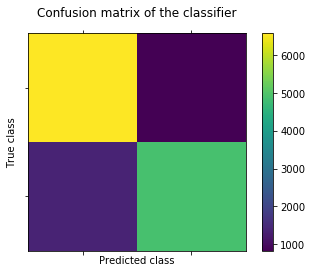

In [84]:
#DEFAULT CONFUSION MATRIX FROM CLOUD COMPUTATION OF ABOVE CODE:

confusion = [[6569, 829], [1407, 4896]]
print("Confusion matrix:\n{}\n".format(confusion))


import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [ ]:
#Using default accuracy scoring from ANN estimator to get score from the model created by Random search.
print("Accuracy: {}\n".format(random_searchANN.score(Reduced_X_test,y_test)))

#Calculating F1 score for best model and parameters with test data.
print("f1 score: {:.2f}\n".format(f1_score(y_test, ypred)))

#Calculating precision through summarising classification report function
print(classification_report(y_test, ypred))

#Calculating AUC/ROC for the best grid_search model trained on whole data and tested on testset. 
#predicting with output as probability of class allocation for each observation:
y_pred_proba = random_searchANN.predict_proba(Reduced_X_test)[:,1]
#Calcutating the AUC score for the model:
print("AUC score is:\n{}\n".format(roc_auc_score(y_true = y_test, y_score = y_pred_proba)))

Confusion matrix:

 [6569  829]

 [1407 4896]

Accuracy: 0.83680023565213

f1 score: 0.81

             precision    recall  f1-score   support

          0       0.82      0.89      0.85      7398
          1       0.86      0.78      0.81      6303
          3       0.84      0.84      0.84     13701

ROC score is:
0.888831221648638

### Summary of ANN:
Firstly, similar to our SVC prior to comparisons between models we must acknowledge that due to computational limitations both in our primary hardware and secondly in outsourcing to Google Cloud we had to compromise on the breadth of our hyperparameter search and depth of our Neural Network Architecture. This has resulted in resorting to a randomised search of the parameter space consisting only 10 iterations. Therefore, our model is unlikely to be within the 5% optimum for the best hyperparameters due to the nature of randomly sampling only 10 times from our parameter space. The justification was thus due limited resources, however, if further resources were available it would be adviced to increase the iterations to 60 which gives a much higher probability of being within the 5% optimum for accuracy or the best hyperparameters for the model. 

In regards, to our best trained ANN model we decided to use a dense layering schema from a simple sequential model. More complex models such as Recurrent Neural networks (e.g. LSNN) or Convolutional neural networks were not considered as these do not meet our goal of prediction over a non-time stampled, ordered or sequential dataset. We decided to train only the drop-out rate and other key parameters and with only 1 hidden layer from input to output layers to reduce complexity and thus computation. 

The results, indicate that our best trained ANN performed better than the logistic regression model, though worse than both the Random Forest and SVC in terms of accuracy and F1 score. One noticable distinction is that this model had the highest bias towards negative classifications, with the most false negatives and greatest difference between false positive and false negative results. In terms of AUC we can see the ANN model actually performed better than the SVC model. Overall, however, this suggests thus far that the Random Forest Model is still the most appropriate model from our analysis for prediction purposes having a greater degree of interpretation - not being trained on the reduced PCA data unlike the ANN - and additionally having feature importance functionality and further both a higher ROC and F1 score than the ANN model.

It is suggested, however, that with further resources a deeper ANN with a larger amount of iterations for a randomised search or further using an optimised hyperparameter search incorporating priori knowledge of prior search results could give a more comprehensive result in terms of predictive accuracy from an ANN built on this dataset.







## 5. Choosing a model, Training, Evaluation, Hyperparameter Tuning and Prediction - Gradient Boosted Tree - XGBoost

Firstly, as XG Boost is a significantly complex model like ANN's and thus interpretation is rather limited prior
to using PCA dimensionality reduction, the reduced training data will thus be highly beneficial for computational efficency in training. Furthermore, we have again implemented Google Cloud computing to undertake a more thorough search of the parameter space using a randomised parameter search protocol with 60 iterations. This has been undertaken as our hardware was not sufficient enough with such a large dataset and in using these more complex models when training. Using 60 iterations we have a good probability of getting within 5% of the optimum range for best parameters with the multidimensional parameter space of the random search, whilst being far more efficient and quicker as compared with a brute-force grid search.

In [ ]:
import xgboost as xgb
#creating XG tree-gradient-boosting model:
xgb = xgb.XGBClassifier()
#Creating a parameter grid dictionary for hyperparameter tuning:
param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [50, 100, 150]}

#Commencing random search for optimized hyperparameter tuning:
xgb_search = RandomizedSearchCV(xgb, param_distributions=param_grid,cv=3, verbose=0,refit=True, n_iter=60, n_jobs=-1)
#fitting the model:
xgb_search.fit(Reduced_X_train, y_train)
#Printing the best parameters after completeing a randomised grid search over main parameters with
#an internal 5-fold cross validation using a XGBoost model and standardised training data with validation data
print("Best parameters: {}".format(xgb_search.best_params_))
#Printing the best parameters after completeing a grid search for all parameters with
#an internal 3-fold cross validation using a XG Boost model and standardised training data with validation data
print("Best cross-validation score: {:.2f}".format(xgb_search.best_score_))

### Best Parameters of XG Boost (Gradient Boosted Tree) from Cloud Computation:
Best parameters: {'max_depth': 15, 'n_estimators': 100, 'gamma': 0.5, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'subsample': 0.8, 'min_child_weight': 10.0, 'silent': False, 'reg_lambda': 50.0, 'colsample_bylevel': 0.9}

Best cross-validation score: 0.84

In [ ]:
print("Saving best parameter XGB model")
pickle.dump( xgb_search, open( "Best_XGB_model.pkl", "wb" ) )
print("Model has been saved to Best_XGB_model.pkl in working directory ")

In [ ]:
#Loading in the best ANN model:
xgb_search=pickle.load(open("Best_XGB_model.pkl","rb"))

### Results of XGBoost from Google Cloud Computation using n1-standard-8 machine:
Note: The same code in the document was used in a google datalab jupyter environment to obtain the below outputs from best models in the above parameter search. Unfortunately, we were not able to save this final model from the cloud using pickle and import this pickle file to use directly within this project file. This is the justification for copying in outputs in this manner. Alternatively if you run the model fitting above, you will also return the same result though these searches will be costly and timely without a machine with CPU capacity greater than 8.

If running above code for model output uncomment the below two statements to create confusion matrix and comment out default confusion matrix.

In [79]:
#CONFUSION MATRIX FROM RUNNING ABOVE CODE:

#Creating prediction variable for constructing confusion matrix
#ypred = xgb_search.predict(Reduced_X_test)

#Creating manual confusion matrix with results from cloud computed output:
#confusion = confusion_matrix(y_test, ypred)

If not running above models that use default confusion matrix with inputted values from cloud computation of the above model fitting code:

Confusion matrix:
[[6584, 814], [1466, 4837]]



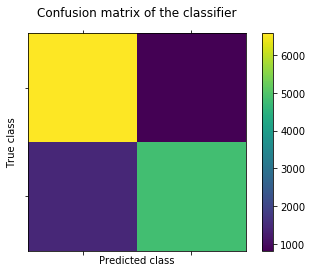

In [81]:
#DEFAULT CONFUSION MATRIX FROM CLOUD COMPUTATION OF ABOVE CODE:

confusion = [[6584, 814],[1466, 4837]]
print("Confusion matrix:\n{}\n".format(confusion))


import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [ ]:
#Using default accuracy scoring from logistic regression estimator to get score from the model created by Grid_Search.
print("Accuracy: {}\n".format(xgb_search.score(Reduced_X_test,y_test)))

#Calculating F1 score for best model and parameters with test data.
print("f1 score: {:.2f}\n".format(f1_score(y_test, ypred)))

#Calculating precision through summarising classification report function
print(classification_report(y_test, ypred))

#Calculating AUC/ROC for the best grid_search model trained on whole data and tested on testset. 
#predicting with output as probability of class allocation for each observation:
y_pred_proba = xgb_search.predict_proba(Reduced_X_test)[:,1]
#Calcutating the AUC score for the model:
print("AUC score is:\n{}\n".format(roc_auc_score(y_true = y_test, y_score = y_pred_proba)))

Accuracy: 0.8335887891394789

f1 score: 0.81

             precision    recall  f1-score   support

          0       0.82      0.89      0.85      7398
          1       0.86      0.77      0.81      6303
          T       0.84      0.83      0.83     13701

ROC score is:
0.8938028390296514

### Summary of XG Boost (Gradient Boosted Tree Variant):
We have decided to in addition to the prior 4 models assess the effectivness of another Ensemble Tree method from a similar family as our high performing Random Forest Model, with this particular XG Boost model being recognised within the Machine Learning community as being a significantly effective model in predictive classification tasks. We have supplemented computational power using Google cloud platform and the results gives a satisfactory search of the parameter space through randomised sampling cross validation. We can see that performance is better than our linear model and ANN in terms of accuracy and ROC. Although when compared with our SVC model performance was similar for both metrics. Again there is significant bias towards the false negative class and large amount of false positive classes. Finally, we can see despite being from the same family as the Random Forest, the XG Boost we have trained is slightly less effective for the task, additionally using PCA reduced training data and having a higher complexity, thus significantly reduced interpretability.
Overall, we can see that the Random Forest still produces the best overall results for F1 score and AUC with the benefit of some degree of interpretability of the results through feature importance.

## Interpretation of Final Model: Random Forest

As we have discussed, the model with highest predictive power from the five best models trainined for the prediction of Heart Disease on the Redfern Hospital dataset and with consideration of the limitations of computational resources of the study and differing degrees of capability in undertaking hyperparameter searches and cross-validation iterations of the same degree is the Random Forest Model. We will interpret this models using Random Forest feature importance.

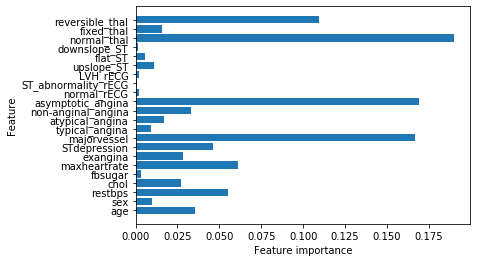

In [82]:
#Function for plotting feature importances for vizualisation on the final model: Random Forest model.
import matplotlib.pyplot as plt
Random_forest = Random_forest_model.best_estimator_.steps[0][1]
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(Random_forest)

As we can see thalassemia levels, the presence or absence of angina and the number of major vessels colored by fluoroscopy are three particularly significant variables within the model. Sex surprisingly did not return significant in terms of feature importance with this likely being due to the significant imbalance between males and females. We can observe there are six features in particular that stand out as being particularly important with the model. We will plot these seperately from other features for further analysis.

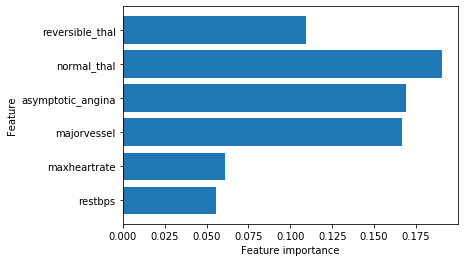

In [83]:
def top6_plot_feature_importances(model):
    
    #locate indices of the features with non-zero feature importance
    indices = np.where(model.feature_importances_ >= 0.05)[0]
    
    #extract the number of features that have non-zero feature importance
    n_features = X.iloc[:,indices].shape[1]
    
    #plot the features that have a non-zero feature importance
    plt.barh(range(n_features), model.feature_importances_[indices], align='center') 
    plt.yticks(np.arange(n_features), X.iloc[:,indices].columns) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
top6_plot_feature_importances(Random_forest)

We can see from the above plot that normal thalassemia, asymptotic angina and major vessels colored by fluoroscopy were respectively the top three most important features within the final Raondom Forest model being far ahead of the later features reversible thalassemia, maximum heart rate and resting blood pressure as the remaining top fourth, fifth and sixth important features respectively.

## Deployment of Final Model: Random Forest

When considering deployment, one of the most important considerations is the context for which the final model will be operating and it's purpose. Thus in the diagnosis of heart disease, it would be essential to have a model that minimises false negatives and maximises true positives. As the binary outcome from the dataset was slightly imbalanced being biased towards the negative class we could expect that a model without the application of class weights would be prone to over-classification of patients as being negative for heart disease diagnosis thus we could expect a higher recall and precision amongst the negative classes as compared with the positive classes. This consideration is highly important in the deployment of a model into the healthcare system whereby a tendency for type II errors or false negatives may have detrimental impacts on a patients well-being in the context of recieving an indication of the absence of heart disease by our predictive model where in fact the ground truth from the data indicates the patient likely has heart disease. We found all our models suffered to some degree from this bias towards the negative class, with our final model - the Random Forest Model - minimising these type II errors and reducing this bias to highest degree out of the five models trained. Overall, our final RF model had 1171 false negatives far lower than the other four models; logistic regression, SVC, ANN and SG Boost that averaged around 1400 false negatives. Additionally, we can observe that the Random Forest model also had the second highest true positive rate at 966 with the logistic regression model having the highest true positive rate at 1086 although with far higher type II errors - an indication of the Random Forests balanced predictive performance in correctly diagnosing patients with heart disease and those without as compared with the remaining four models. Furthermore, the F1 score in addition to the accuracy was evaluated between these models, again supporting the above findings in terms of the confusion matrix statistics and recall/precision trade-off finding that the Random Forest Model had the highest F1 score of the five models, further with recall and precision far closer together in value suggesting this model was the most balanced in correct predictions amongst performance in both classes, while still minimising type II errors important in the clincial context. The Random Forest model distinctly had the highest Area under the curve (AUC) amongst all models at 0.906 indicating the best maximised trade-off between sensitivity (TPR) and specificity - respectively the ability to detect positives and the ability of the model to reduce false classifications or errors. Finally, with these evaluation metrics considered the model also had the highest accuracy at 0.844, with only slight imbalance in the dataset indicating that amongst the five models the Random forest had the best general predictive performance in addition to reducing the more contextual clincial measure of type II errors or false negatives. 

With the clincial context and general predictive metrics/overall predictive power in classifying diagnosis of heart disease being a primary consideration in the selection and deployment of our final model, the second major factor for deployment was interpretability. Despite the goal of the study being the prediction of heart disease for the clinical team and fast-tracking and identification of patients suitable for early intervention, interpretability for the clincial team highlighting what has guided the models decisions is highly important. Firsly, in providing insight into the functioning of the machine and the decision process and secondly for building a sense of understanding and confidence between the predictive model and clinicans in utilising the models predictions. Amongst the five models trained we can see that only the logistic regression model and random forest model allow access to the original features for interpretation and further a means of assessing which features were most influential in the classification process for each respective model. This was due to the fact dimensionality reduction through primary components analysis (PCA) was applied to the more complex and computationally taxing models such as the Artifical Neural Network (ANN), Support Vector Machine and Gradient Boosted Decision Tree (XGBoost). Our final model, the Random Forest, thus provides a basis for clincians to assess which features the model deemed most important with these being untransformed by dimensionality reduction. We found that there were six key features that were most influential in the final models predictions, these being discussed above. Interestingly, asymptomatic angina, normal thalasemmia and a greater number of major vessels recorded from fluroscopy seemed highly important. This thereby provides a degree of insight and interpretability for the clinical team and was another key consideration in choosing the Random forest model as our final model the one most suitable for deployment in this case. 

There were major limitations in our study we must discuss prior to analysis of whether our hypothesis was correct and prior to delving into considerations of how benefical our final model would be to the Redfern ED clinical team if implemented. These limitations were primarily our computational resources. Our first two models the logistic regression classifier and the Random Forest classifer both were robustly trained using a brute-force grid search algorithm and satisfactory parameter set. This was due to these models both being relatively easy to train in terms of complexity and training cost. However, as we moved to more complex models such as the SVC, ANN and XGBoost it became apparent that the computational power available to us was not sufficient to train these three models in the same manner or within the same scope. For these models we chose to apply cloud computation through Google Cloud and datalab software using a n1-standard-8 machine type increasing our CPU capacity for training from 2 CPUs to 8 allowing us to adopt distributed learning through parallel processing capacities built into keras, tensor-flow and scikit-learn models. Furthermore, we reverted from using a comprehensive grid-search algorithm to a randomised sampling algorithm and reduced the cross-validation iterations from 5 to 3. Despite, using cloud computing capabilities the parameter set or parameter space used was still far smaller for both SVC and ANN models whereby it is highly likely that with the 10 random sampled models evaluated within each cross-validation set for each model we likely did not reach within the 5% optima for best parameters for these two model types. However, when training the XGBoost we were able to use 60 iterations with a large parameter set, thereby giving a comprehensive and far more robust result for our best trained XGBoost model. This model was inferior to our Random Forest model and thus helped us support prior evidence that the Random Forest model was the more appropriate final model of the five model types. It must be stated however, that with greater computation capacity and resources it is possible a deeper ANN model with more layers and a more comprehensive optimized parameter search could possibly provide better results and similarly an SVC using different kernels and greater scope of parameter search could also potentially yield a better model for the dataset and purpose of this study. With training limitations and time contraints in training - training times of greater than 30 hours without output - preventing as robust training and parameter searches for best models of these two types particularly. 

In conclusion, the hypothesis that a predictive model could be built upon the Redfern dataset to effectively predict heart disease was overall correct. We can see that with our final Random Forest model it would be possible to create a predictive tool for augmenting the Redfern ED's Heart Disease workflow with an accuracy of 84% and AUC of 90%. However, this model if deployed could only serve as a guide in recommending patients to the clinical team who are highly likely to have heart disease if it was further supported by protocols, procedures and a reliable infrastructure designed to capture patients falling within the type II error classification group - those patients falsely classified as not having heart disease when in fact they are highly likely to have the disease. Whether there would be benefit in deploying such a complimentary system based around this final model would need to be assessed by comparing the current ability for physicians in Redfern ED in predicting heart disease at the current time and if this final model out-performs or performs at the same rate as this current gold-standard. If this was the case, then the model supported by a fast-track clinical pathway for positively classified patients for early intervention and a complimentary reassessment pathway for patients negatively classified to be reassessed by a clinical team to avoid missing misclassified type II error patients, would provide benefit in the prediction of HD in redfern hospital. Furthermore, it is recommended a team of health data scientists manage the model throughout deployment maintaining the model if deployed and augmenting it as new ED data is created and as trends and patterns underlying the generative population of the dataset change with time. Finally, with greater computational resources as discussed, more robust assessment of these models and alternative models could be undertaken to better improve predictive accuracy and reduce these type II errors, type I errors and increase positive predictive power.